<div style="width:100%;text-align: center;"> <img align=middle src="https://uoflhealth.org/wp-content/uploads/2022/02/heart-attack.jpg" width="1000px" height="150px">

-------
<h2> Table of Contents </h2>
    
<ol style= "color:brown;
            font-size:20px;">
    <li> Import Libraries</li>
    <li> Read Data</li>
    <li> Get some information about the data</li>
    <li> Determine if the column is categorical or numerical </li>
    <li> Data Cleaning</li>
    <li> Data Visualization & Getting Analysis </li>
    <li> Insights </li>

</ol>



-----
## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

-----
## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

----
## Get some information about the data

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


-----
<div>
<p>
    <h2> About Columns </h2>
</p>
</div>


<ul style= "color:#137667;
            font-size:18px;">
    <li> cp : Chest Pain type</li>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : Target variable</li>
</ul>

----
## Determine if the column is categorical or numerical

In [8]:
unique_vals=[]

for c in df.columns:
    vals_cnt=df[c].value_counts().count()
    unique_vals.append(vals_cnt)

pd.DataFrame(unique_vals,index=df.columns,columns=['Total unique values'])

,Total unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


<div>
    <p style="padding: 9px;
          color:red;
          font-size:180%;
          letter-spacing:0.5px;" >
                       Notes </p>


<ul style= "color:#137667;
            font-size:19px;">
    <li> Minumum unique values --> Categorical data </li>
    <li> Maximum unique values --> Numerical data </li>
    <li> Categorical = [age ,trtbps, chol, thalachh, oldpeak] </li>
    <li>Numerical = [sex, cp, fbs, restecg, exng, slp, caa, thall, output] </li>
</ul>
</div>

----
## Data Cleaning

In [9]:
# get the number of nulls in each column

df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<p style="color:red;
          font-size:22px;"> --> No Nulls </p>


In [10]:
# display the duplicated rows

df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
# remove duplicated rows

df.drop_duplicates(inplace=True)

-----
## Data Visualization & Getting Analysis


In [12]:
categorical_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
numeric_cols = ['age','trtbps','chol','thalachh','oldpeak']

<Figure size 1200x1000 with 0 Axes>

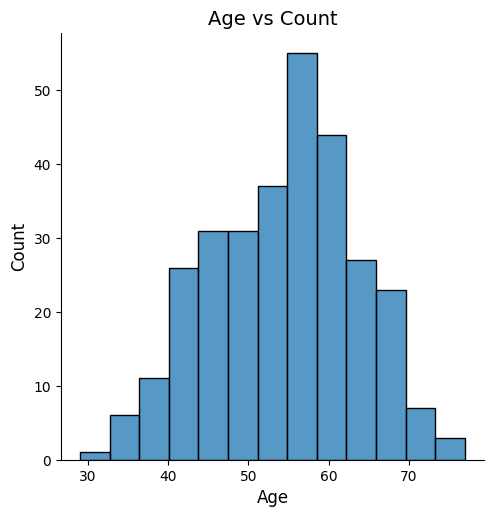

In [13]:
# Age vs Count

plt.figure(figsize=(12,10))
sns.displot(df['age'])
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Age vs Count' ,fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the people's age are between 50 and 62

<Figure size 1200x1000 with 0 Axes>

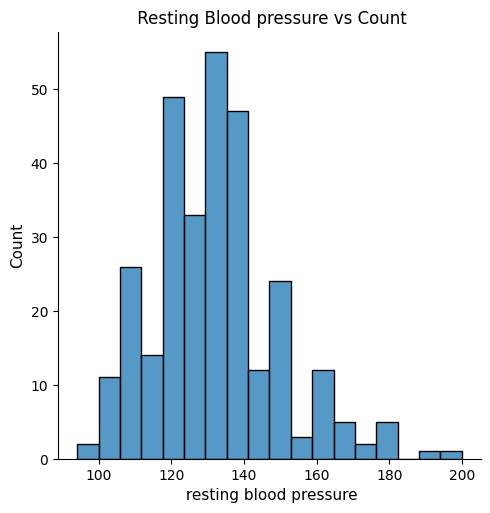

In [14]:
# resting blood pressure vs Count

plt.figure(figsize=(12,10))
sns.displot(df['trtbps'])
plt.xlabel(' resting blood pressure',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.title(' Resting Blood pressure vs Count',fontsize=12)
plt.show()

### <font color='red'> Result </font>: Most of the people's resting blood pressure are between 120 and 140

<Figure size 1200x1000 with 0 Axes>

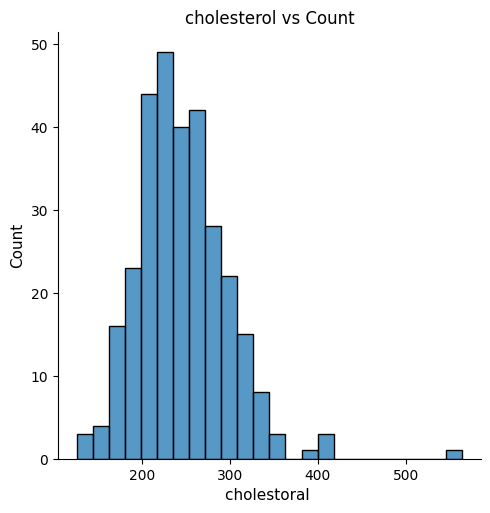

In [15]:
# cholesterol vs Count

plt.figure(figsize=(12,10))
sns.displot(df['chol'])
plt.xlabel('cholestoral ',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.title('cholesterol vs Count',fontsize=12)
plt.show()

### <font color='red'> Result </font>: Most of the people's cholesterol are between 200 and 290

<Figure size 1200x1000 with 0 Axes>

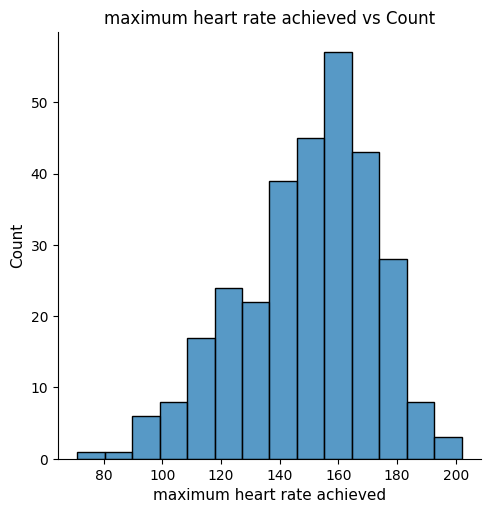

In [16]:
# maximum heart rate achieved vs Count

plt.figure(figsize=(12,10))
sns.displot(df['thalachh'])
plt.xlabel('maximum heart rate achieved',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.title('maximum heart rate achieved vs Count',fontsize=12)
plt.show()

### <font color='red'> Result </font>: Most of the people's maximum heart rate achieved are between 145 and 175

<Figure size 1200x1000 with 0 Axes>

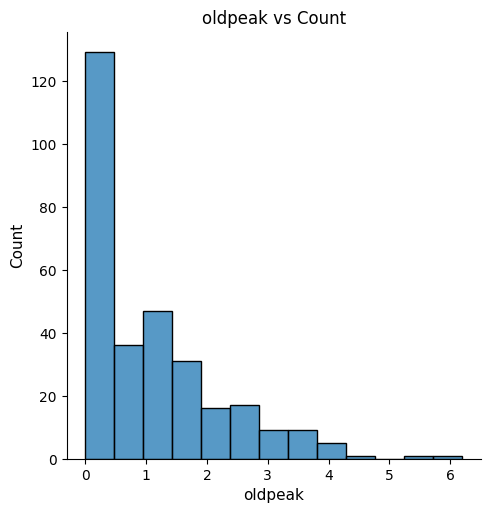

In [17]:
# oldpeak vs Count

plt.figure(figsize=(12,10))
sns.displot(df['oldpeak'])
plt.xlabel('oldpeak',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.title('oldpeak vs Count',fontsize=12)
plt.show()

### <font color='red'> Result </font>: Most of the people's previous peak is between 0 and 1.5

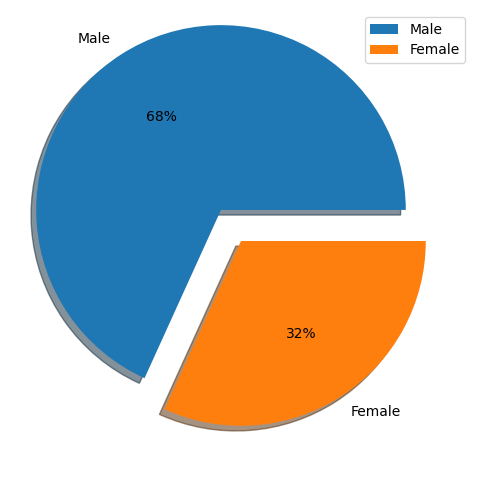

In [18]:
# Sex vs Count

plt.figure(figsize=(8,6))
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],autopct='%.0f%%',explode=[.2,0],shadow=True)
plt.legend()
plt.show()

### <font color='red'> Result </font>: Most of the people are male

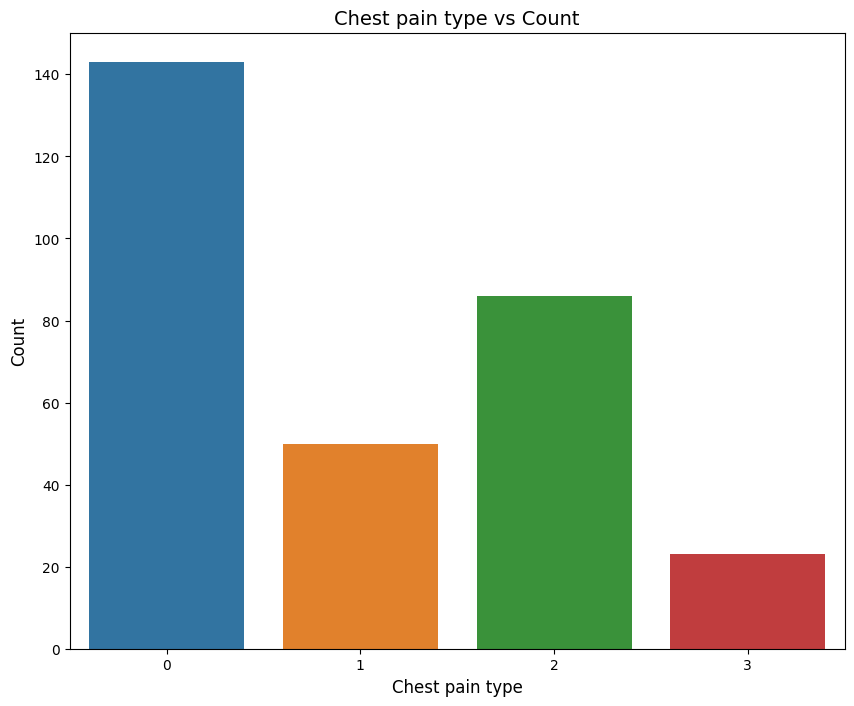

In [19]:
# Chest pain type vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['cp'])
plt.xlabel('Chest pain type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Chest pain type vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the people's chest pain type are typical angina



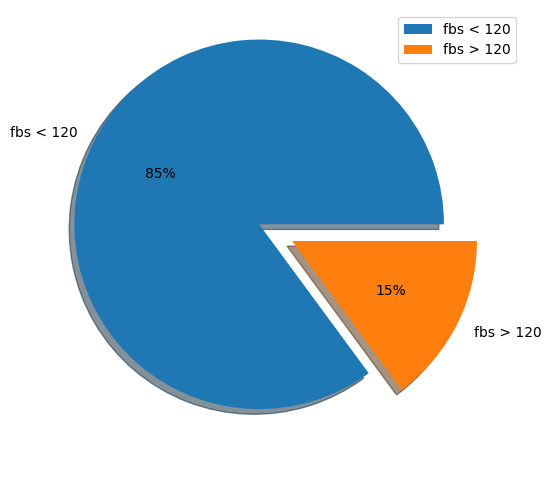

In [20]:
# Fasting blood sugar vs Count

plt.figure(figsize=(8,6))
plt.pie(x=df['fbs'].value_counts(),labels=['fbs < 120','fbs > 120'],autopct='%.0f%%',explode=[.2,0],shadow=True)
plt.legend()
plt.show()

### <font color='red'> Result </font>: Most of the people's fasting blood pressure are less than 120 mg/dl

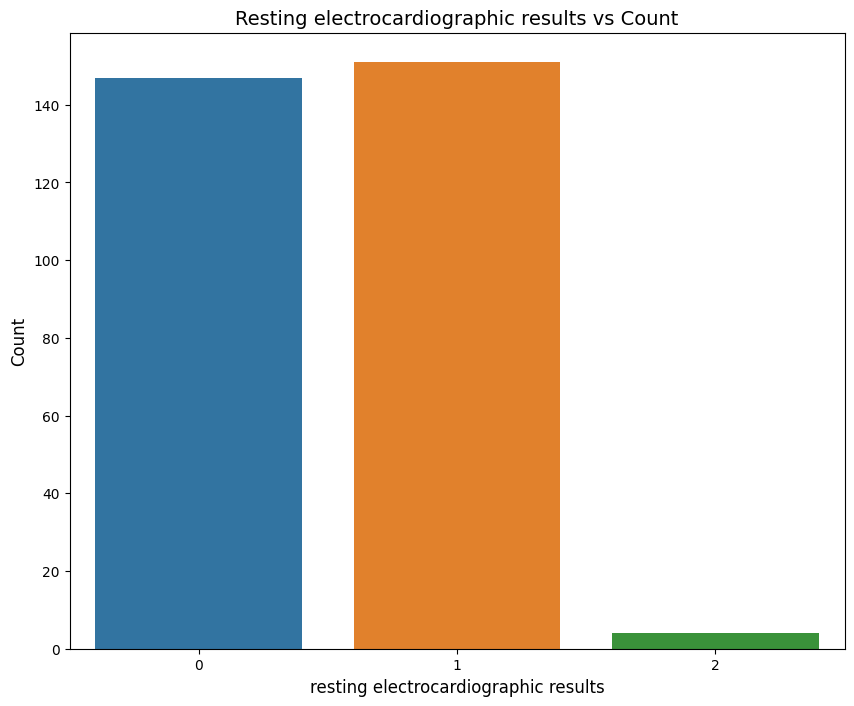

In [21]:
# resting electrocardiographic results vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['restecg'])
plt.xlabel('resting electrocardiographic results',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Resting electrocardiographic results vs Count',fontsize=14)
plt.show()


### <font color='red'> Result </font>: Most of the people's resting electrocardiographic results having ST-T wave abnormality 


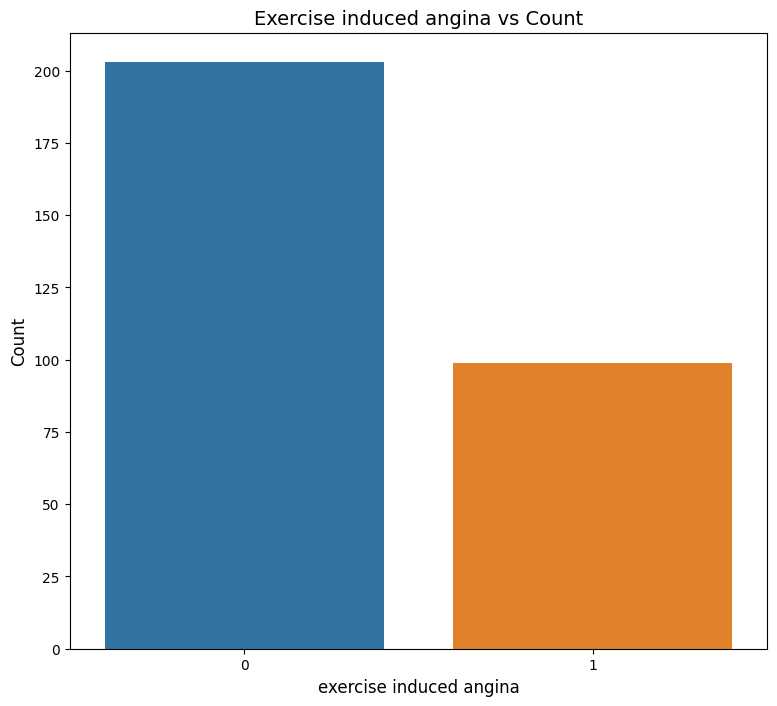

In [22]:
# Exercise induced angina vs Count

plt.figure(figsize=(9,8))
sns.countplot(x=df['exng'])
plt.xlabel('exercise induced angina',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Exercise induced angina vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the people don't have exercise induced angina

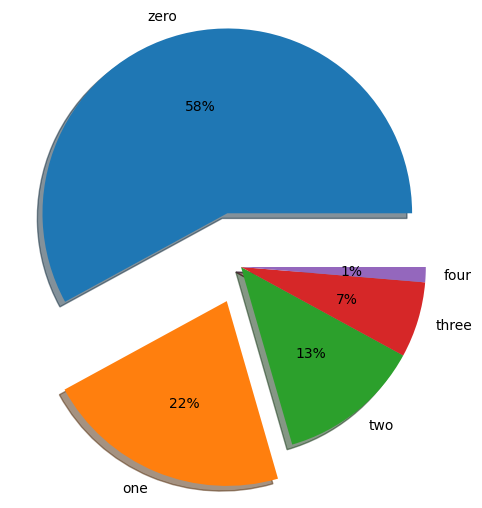

In [23]:
# Number of major vessels vs Count

plt.figure(figsize=(8,6))
plt.pie(x=df['caa'].value_counts(),labels=['zero','one','two','three','four'],autopct='%.0f%%',explode=[.3,.2,0,0,0],shadow=True)
plt.show()

### <font color='red'> Result </font>: Most of the people have zero major vessels

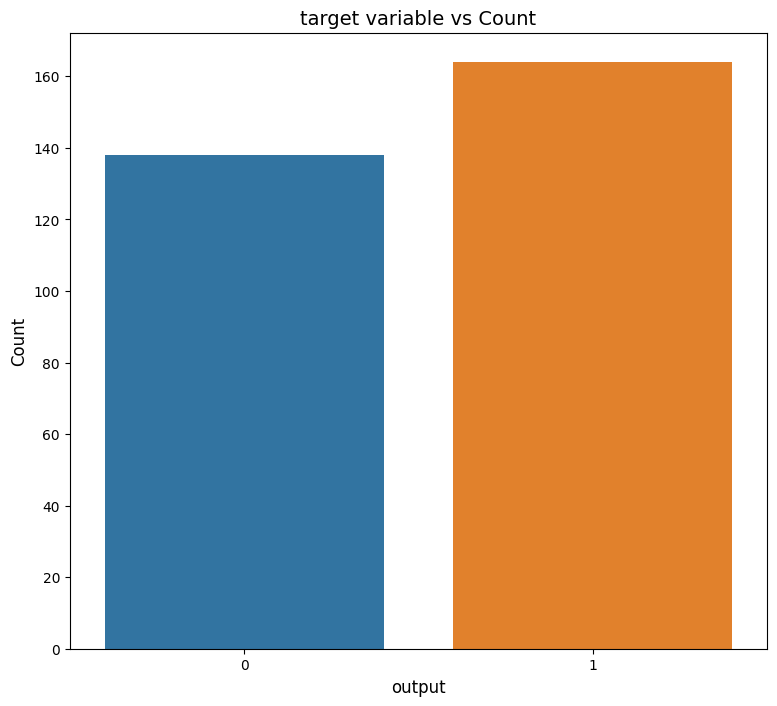

In [24]:
# Output vs Count

plt.figure(figsize=(9,8))
sns.countplot(x=df['output'])
plt.xlabel('output',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('target variable vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the people are at high risk for heart attacks

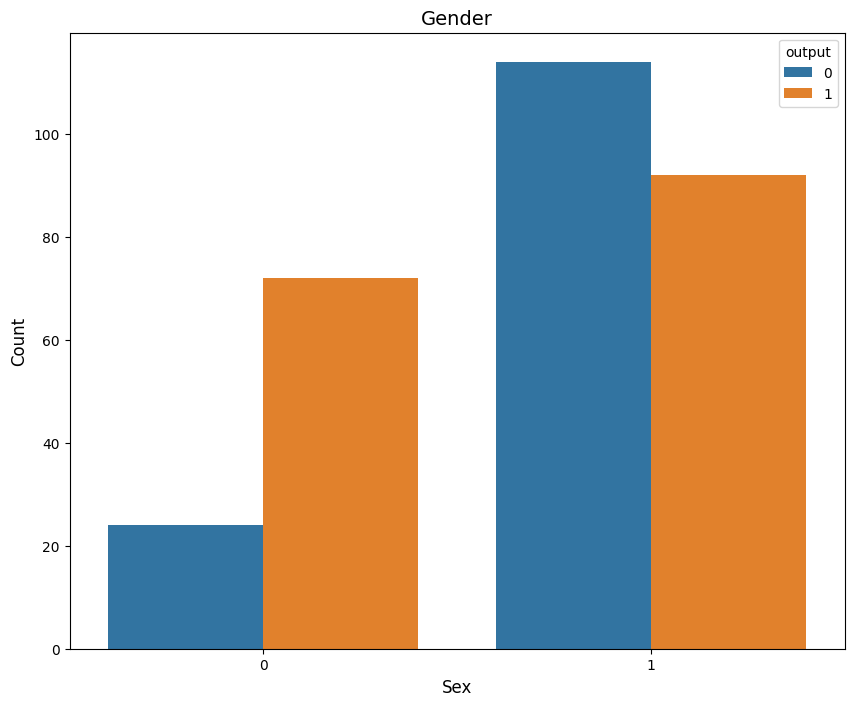

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['sex'],hue=df['output'])
plt.xlabel('Sex',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Gender',fontsize=14)
plt.show()


### <font color='red'> Result </font>: Females are at high risk for heart attacks than males

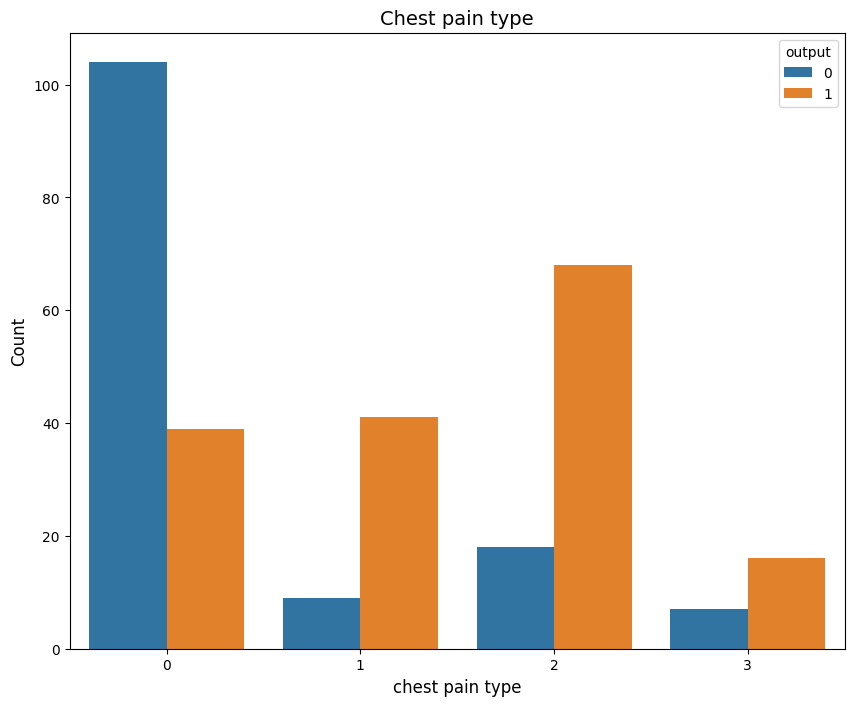

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['cp'],hue=df['output'])
plt.xlabel('chest pain type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Chest pain type',fontsize=14)
plt.show()


### <font color='red'> Result </font>: People who suffer from non-anginal pain are at high risk for heart attack

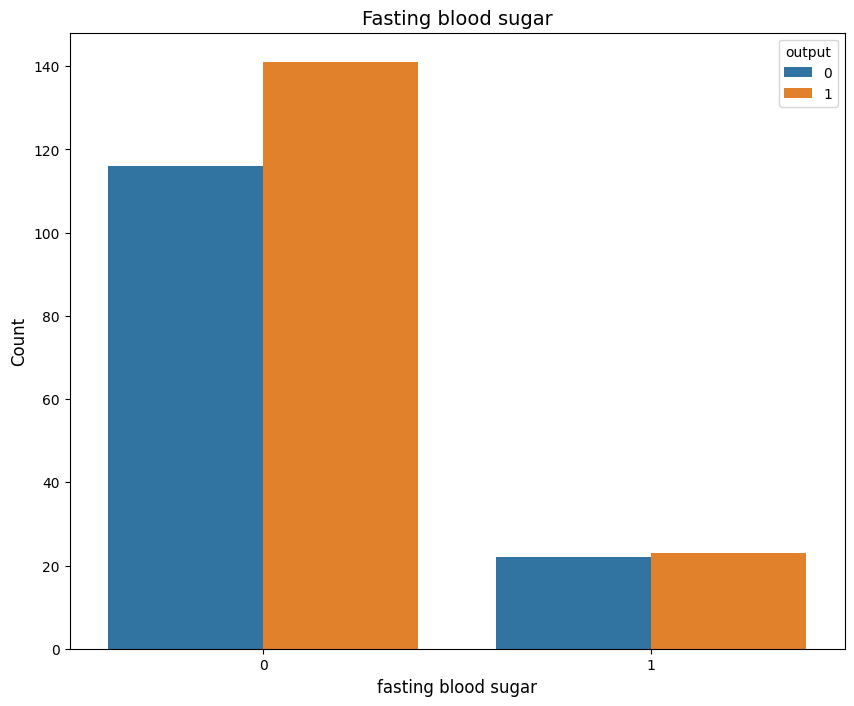

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['fbs'],hue=df['output'])
plt.xlabel('fasting blood sugar',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Fasting blood sugar',fontsize=14)
plt.show()

### <font color='red'> Result </font>: People with fasting blood sugar less than 120 mg/dl are at high risk for heart attacks

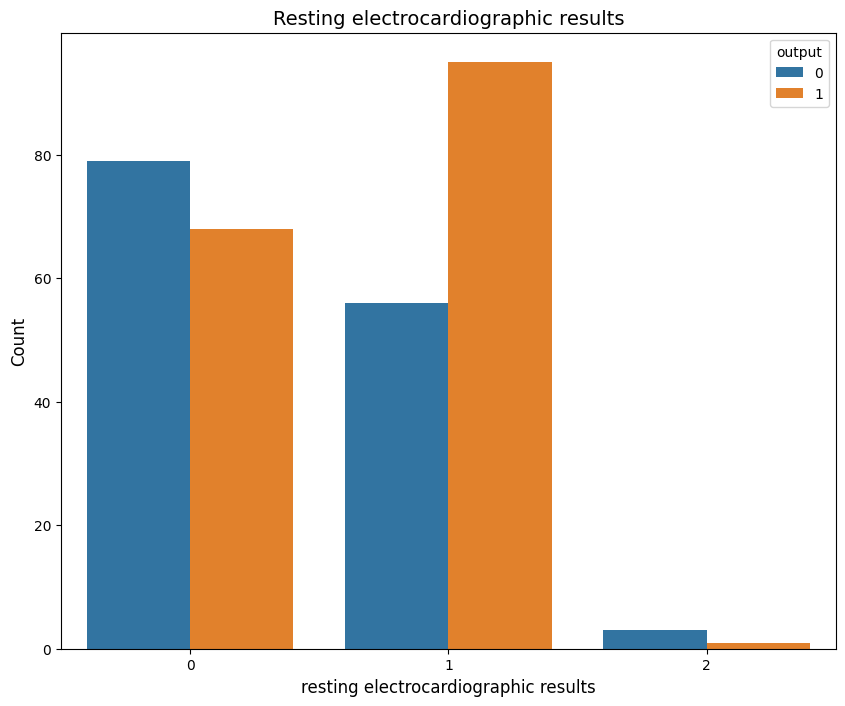

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['restecg'],hue=df['output'])
plt.xlabel('resting electrocardiographic results',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Resting electrocardiographic results',fontsize=14)
plt.show()

### <font color='red'> Result </font>: People who have ST-T wave abnormality are at high risk for heart attacks

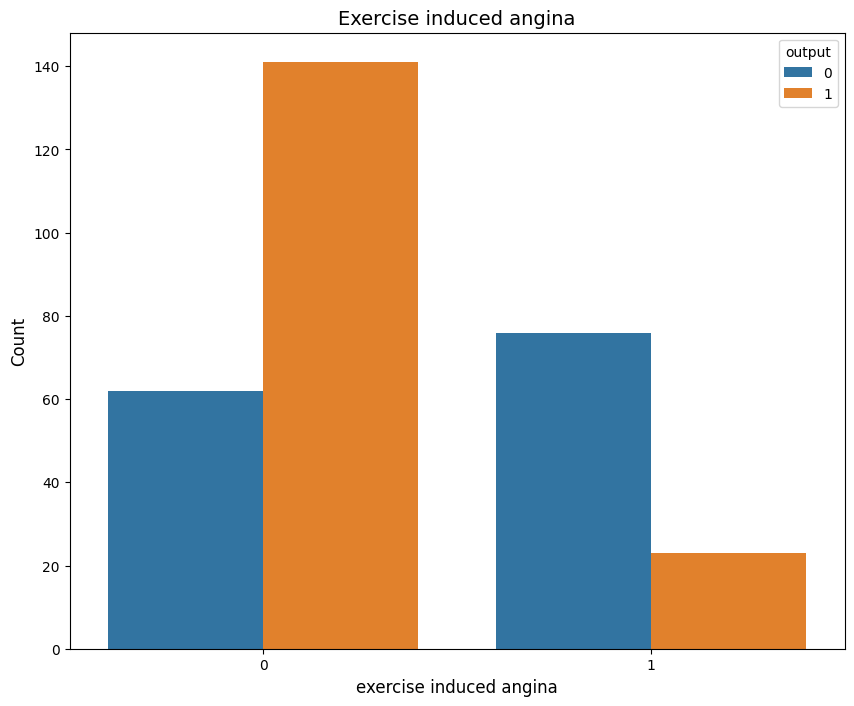

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['exng'],hue=df['output'])
plt.xlabel('exercise induced angina',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Exercise induced angina',fontsize=14)
plt.show()

### <font color='red'> Result </font>: People who don't have exercise induced angina are at high risk for heart attacks

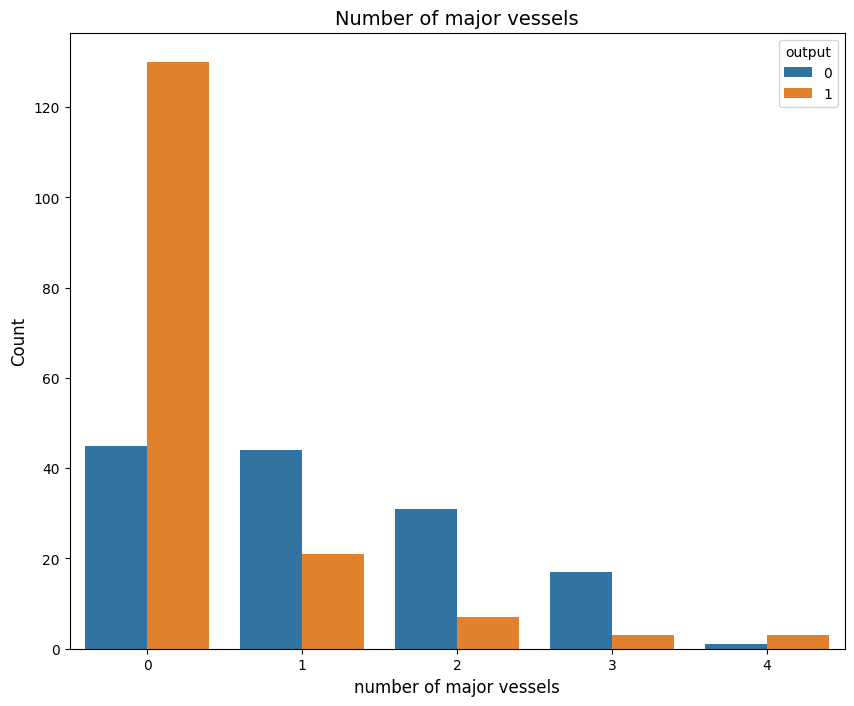

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['caa'],hue=df['output'])
plt.xlabel('number of major vessels',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Number of major vessels',fontsize=14)
plt.show()

### <font color='red'> Result </font>: People who have 0 or 4 major vessels are at high risk for heart attacks

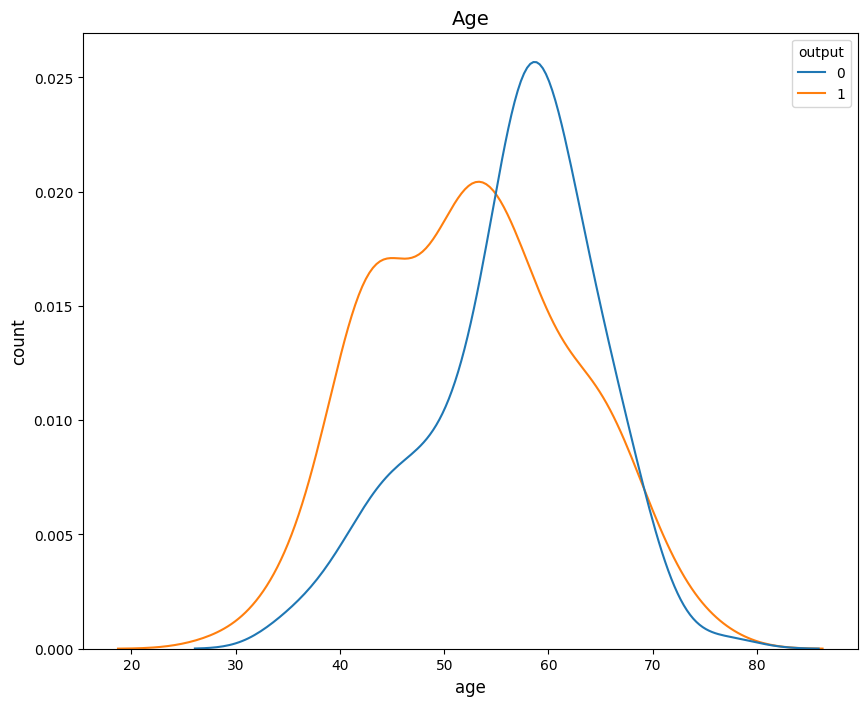

In [31]:
plt.figure(figsize=(10,8))
sns.kdeplot(x=df['age'],hue=df['output'])
plt.title("Age",size=14)
plt.xlabel("age",size=12)
plt.ylabel("count",size=12)
plt.show()

### <font color='red'> Result </font>: People from age 40 to 70 are at high risk for heart attacks

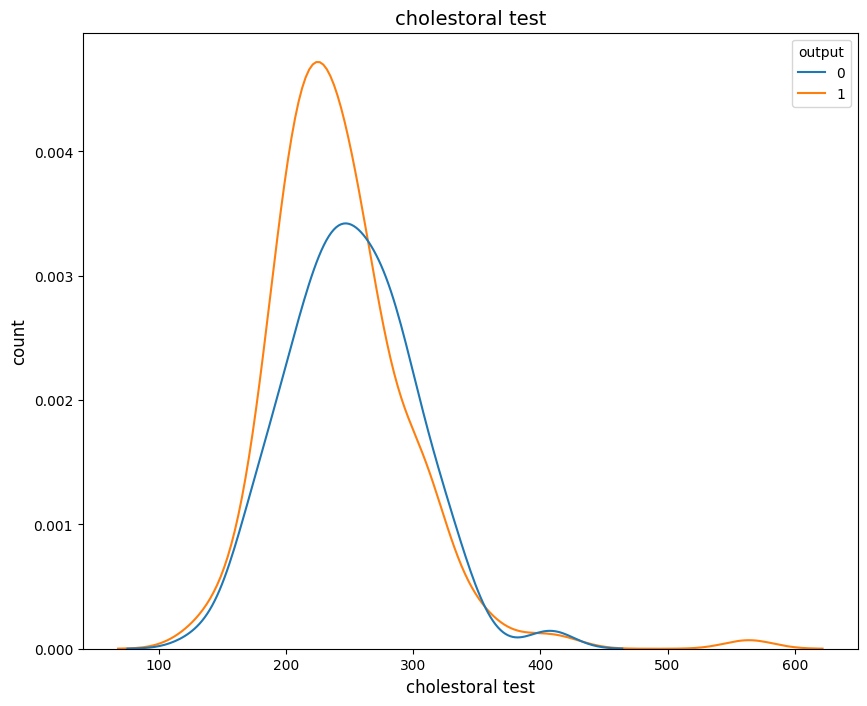

In [32]:
plt.figure(figsize=(10,8))
sns.kdeplot(x='chol',hue='output',data=df)
plt.title("cholestoral test",size=14)
plt.xlabel("cholestoral test",size=12)
plt.ylabel("count",size=12)
plt.show()

### <font color='red'> Result </font>: People with cholesterol between 180 to 300 are at high risk for heart attacks

In [33]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


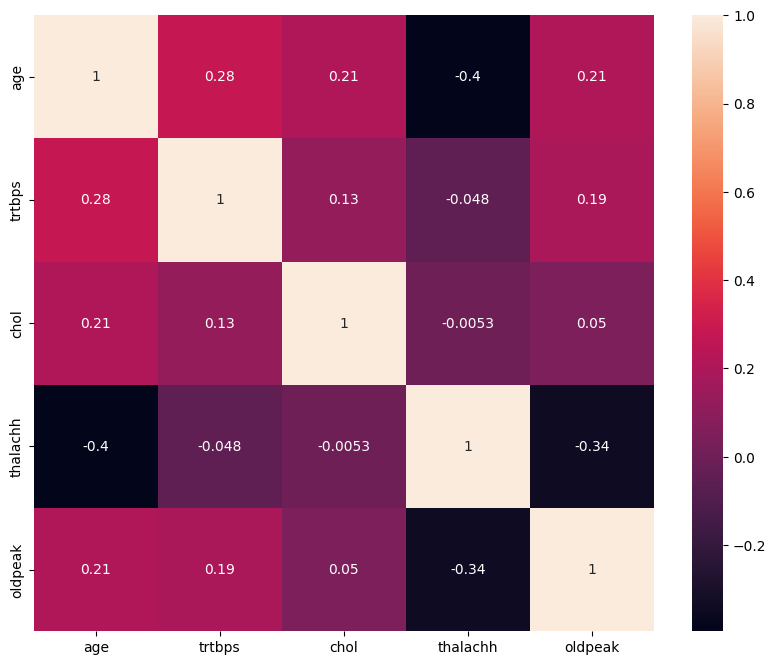

In [34]:
# heatmap for numeric data

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),annot=True)
plt.show()

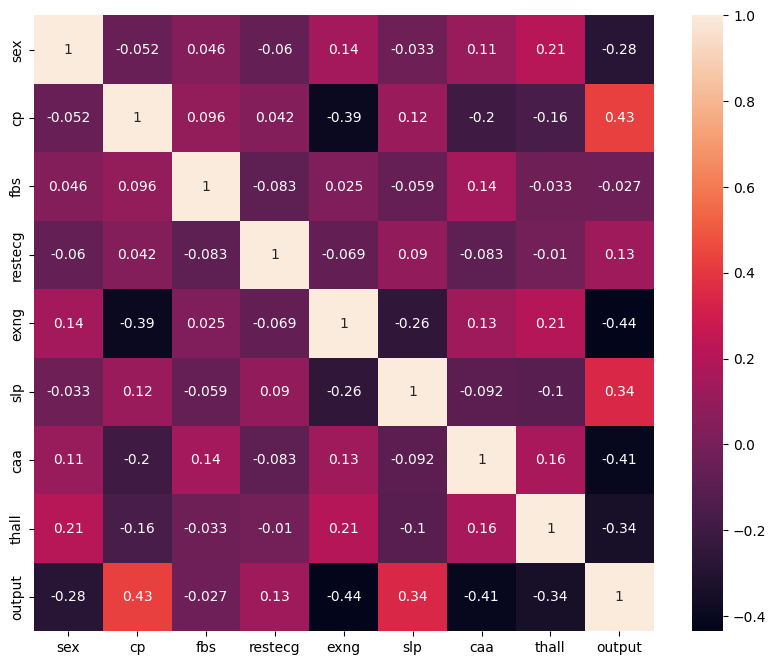

In [35]:
# heatmap for categorical data

plt.figure(figsize=(10,8))
sns.heatmap(df[categorical_cols].corr(),annot=True)
plt.show()

----
## <font color=red> Insights </font>
<ul style= "color:#black;
            font-size:18px;">
    <li> Most of the people's age are between 50 and 62</li>
    <li> Most of the people's resting blood pressure are between 120 and 140</li>
    <li> Most of the people's cholesterol are between 200 and 290</li>
    <li> Most of the people's maximum heart rate achieved are between 145 and 175</li>
    <li> Most of the people's previous peak is between 0 and 1.5</li>
    <li>  Most of the people are male</li>
    <li> Most of the people's chest pain type are typical angina</li>
    <li> Most of the people's fasting blood pressure are less than 120 mg/dl</li>
    <li>  Most of the people's resting electrocardiographic results having ST-T wave abnormality 
</li>
    <li> Most of the people don't have exercise induced angina</li>
    <li> Most of the people have zero major vessels</li>
    <li> Most of the people are at high risk for heart attacks</li>
    <li> Females are at high risk for heart attacks than males</li>
    <li> People who suffer from non-anginal pain are at high risk for heart attack</li>
    <li> People with fasting blood sugar less than 120 mg/dl are at high risk for heart attacks</li>
    <li> People who have ST-T wave abnormality are at high risk for heart attacks</li>
    <li> People who don't have exercise induced angina are at high risk for heart attacks</li>
    <li>People who have 0 or 4 major vessels are at high risk for heart attacks</li>
    <li> People from age 40 to 70 are at high risk for heart attacks</li>
    <li> People with cholesterol between 180 to 300 are at high risk for heart attacks</li>
       
</ul>